In [1]:
import os
print(os.getcwd())

/Users/JKovach


In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
print('Import Complete')

Import Complete


In [3]:
apps = pd.read_csv('/Users/Jkovach/Downloads/google-play-store-apps/googleplaystore.csv')
print(apps.head(n=5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

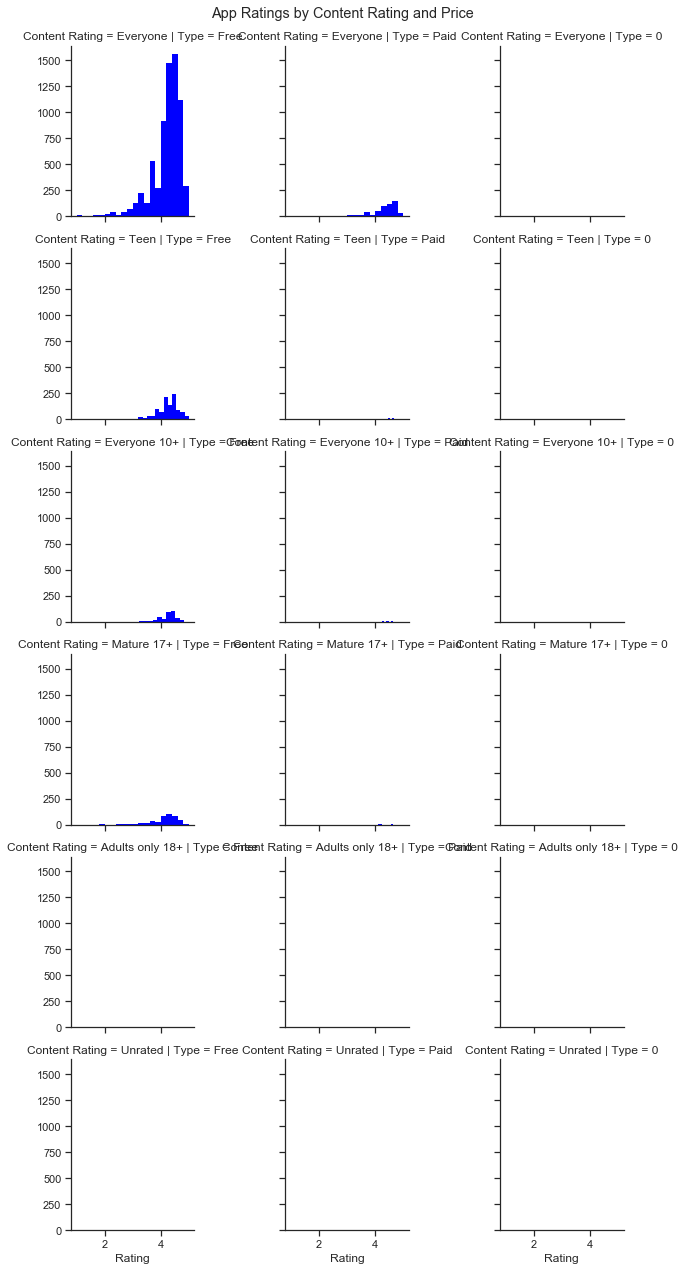

In [4]:
#Showing the information in a seaborn facet grid
sns.set(style='ticks') #Preset aesthetic

#Tell seaborn about data structure
g = sns.FacetGrid(apps, row='Content Rating', col='Type')
#Name the plot type and the variable to be plotted using the created structure
g.map(plt.hist, 'Rating', color='blue', lw=0, bins=20)
#Create space for titles
plt.subplots_adjust(top=.95)
#Title informative axis name
g.set_axis_labels('Rating')
plt.suptitle('App Ratings by Content Rating and Price')
#Remove excess lines around plot
sns.despine(trim=False)
plt.show()

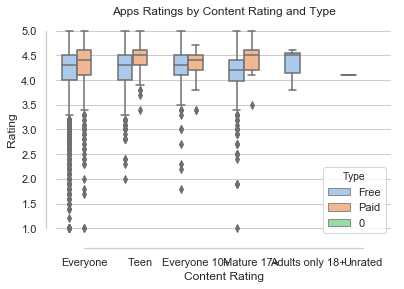

In [ ]:
#Comparing groups again, but with a different emphasis.
#Setting the overall aesthetic.
sns.set(style="whitegrid")
ax = sns.boxplot(x='Content Rating',y='Rating',hue='Type',data=apps,palette='pastel')  
plt.title('Apps Ratings by Content Rating and Type')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Content Rating', ylabel='Rating')
plt.show()

In [ ]:
sns.set(style='whitegrid')
g = sns.lmplot(y='Rating', # Variable 1.
               x='Reviews', # Variable 2.
               data=apps, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Rating")
g.set_xlabels("Reviews")
plt.title('Scatterplot: Ratings by Number of Reviews')
plt.show()